In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential,Model
from keras.layers import Dropout,BatchNormalization,ReLU,Flatten,Input,Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.activations import relu
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam,RMSprop

In [3]:
train = pd.read_csv('/home/varun/Downloads/Digits/train.csv')
test = pd.read_csv('/home/varun/Downloads/Digits/test.csv')

In [5]:
y_train = train['label']

In [6]:
x_train = train.drop(labels='label',axis=1)

In [8]:
x_train/=255.0
test/=255.0

In [10]:
y_train = to_categorical(y_train,num_classes=10)

In [13]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [27]:
x_train[41999].shape

(28, 28, 1)

In [55]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=32)

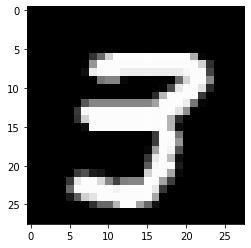

In [36]:
plt.imshow(x_train[2000][:,:,0],cmap = 'gray')

**DEFINE A MODEL**

In [69]:
ip = Input(shape=(28,28,1))
conv1 = Conv2D(filters = 32,kernel_size = 5,strides=(1,1),activation='relu')(ip)
pool1 = MaxPool2D(pool_size = (2,2),strides=2)(conv1)
drop1 = Dropout(rate=0.5)(pool1)
conv2 = Conv2D(filters = 64,kernel_size = 3,strides=(1,1),activation='relu')(drop1)
pool2 = MaxPool2D(pool_size = (2,2),strides=2)(conv2)
drop2 = Dropout(rate=0.5)(pool2)
flat1 = Flatten()(drop2)
fc1 = Dense(512,activation='relu')(flat1)
out = Dense(10,activation = 'softmax')(fc1)
model = Model(inputs=ip,outputs=out)

In [70]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0   

In [71]:
optim = RMSprop()
model.compile(optimizer=optim,loss = 'categorical_crossentropy',metrics=['accuracy'])


In [72]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [73]:
datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1)
datagen.fit(x_tr)

In [74]:
model.fit_generator(datagen.flow(x_tr,y_tr,batch_size=128),epochs=10,validation_data=(x_val,y_val),verbose=2,steps_per_epoch=x_tr.shape[0] // 128
                              , callbacks=[learning_rate_reduction])

Epoch 1/10
 - 11s - loss: 1.7932 - accuracy: 0.3615 - val_loss: 0.8402 - val_accuracy: 0.7481
Epoch 2/10
 - 12s - loss: 1.1748 - accuracy: 0.6049 - val_loss: 0.6134 - val_accuracy: 0.8164
Epoch 3/10
 - 12s - loss: 0.8518 - accuracy: 0.7191 - val_loss: 0.4318 - val_accuracy: 0.8721
Epoch 4/10
 - 12s - loss: 0.6492 - accuracy: 0.7886 - val_loss: 0.3012 - val_accuracy: 0.9167
Epoch 5/10
 - 11s - loss: 0.5276 - accuracy: 0.8283 - val_loss: 0.2521 - val_accuracy: 0.9312
Epoch 6/10
 - 11s - loss: 0.4477 - accuracy: 0.8558 - val_loss: 0.1985 - val_accuracy: 0.9490
Epoch 7/10
 - 11s - loss: 0.3967 - accuracy: 0.8729 - val_loss: 0.1802 - val_accuracy: 0.9526
Epoch 8/10
 - 11s - loss: 0.3548 - accuracy: 0.8868 - val_loss: 0.1577 - val_accuracy: 0.9583
Epoch 9/10
 - 11s - loss: 0.3291 - accuracy: 0.8963 - val_loss: 0.1504 - val_accuracy: 0.9626
Epoch 10/10
 - 11s - loss: 0.3037 - accuracy: 0.9023 - val_loss: 0.1361 - val_accuracy: 0.9619


In [81]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
y_pred_c = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_val,axis=1)

In [83]:
cm = confusion_matrix(y_true,y_pred_c)

In [84]:
cm

array([[404,   0,   0,   0,   0,   0,   1,   0,   2,   0],
       [  1, 468,   8,   1,   1,   0,   0,   0,   2,   0],
       [  2,   2, 379,   2,   0,   0,   2,   4,   1,   1],
       [  1,   0,   7, 423,   0,   6,   0,   3,   3,   6],
       [  0,   0,   0,   0, 377,   1,   5,   2,   0,   7],
       [  0,   0,   0,   4,   0, 379,   7,   2,   1,   2],
       [  1,   0,   0,   0,   0,   2, 440,   0,   1,   0],
       [  0,   0,   5,   0,   0,   1,   0, 396,   0,  13],
       [  5,   3,   3,   3,   3,   2,   4,   4, 372,   7],
       [  0,   0,   2,   8,   2,   0,   0,   3,   1, 402]])

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred_c)

0.9619047619047619